<a href="https://colab.research.google.com/github/mchirico/COVID-19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19**

Note:  You need to make a copy of this note book, if you want to run it yourself
by clicking on "File/Save a copy in Drive"



Sharable link:
https://colab.research.google.com/drive/1RZXskxLFGTMcw7Q88VwIWk7vSceGbIkf







Data From: 
[JHU CSSE](https://github.com/CSSEGISandData/COVID-19)



In [2]:
import requests
import pandas as pd
import numpy as np 
from datetime import datetime



import warnings
warnings.filterwarnings("ignore")

try:
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive
  import torch
except:
  print("Will try to install software")
  # Lines below .... Only need to be run once at the top of the notebook.
  !pip install -q matplotlib-venn
  # #   https://pypi.python.org/pypi/pydot
  !apt-get -qq install -y graphviz && pip install -q pydot
  !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
  !pip install -U -q PyDrive
  !pip install --upgrade -q gspread
  
  !pip install torchvision
  
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive





Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 5.1MB/s 
     |████████████████████████████████| 92kB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.7.2, but you'll have google-auth 1.14.3 which is incompatible.


In [0]:
TMP = '/tmp/data'

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://ihmecovid19storage.blob.core.windows.net/latest/ihme-covid19.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(TMP)

In [4]:
file = !find  /tmp/data -iname '*.csv'
sdate = file[0][len(TMP)+1: len(TMP)+11]
startDate = datetime.strptime(sdate,'%Y_%m_%d')
startDate

datetime.datetime(2020, 5, 10, 0, 0)

In [5]:
p=pd.read_csv(file[0])
p[p['confirmed_infections'] >= 20].head()


,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
86,87,Abruzzo,2020-03-13,29.2308,25.59875,33.90125,8.70435,8.35000,9.15,8.51655,8.20000,8.90,0.0,0.0,0.0,7.33480,5.75000,9.80000,2.23375,2.05,2.50,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,observed,-52.948603,observed,232.285689,20.131392,826.189550,745.971691,972.042365
87,88,Abruzzo,2020-03-14,39.2533,34.90000,44.70375,10.94060,10.50000,11.45,10.69065,10.34875,11.10,0.0,0.0,0.0,11.02250,8.90000,14.05000,3.23625,3.05,3.50,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,observed,-57.046048,observed,240.142831,24.836706,823.524194,729.045519,963.999803
88,89,Abruzzo,2020-03-15,50.4921,45.45000,56.30000,14.40890,13.90000,15.00,14.03620,13.60000,14.55,1.0,1.0,1.0,14.67725,12.10000,18.00000,4.46830,4.15,4.85,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,3.0,observed,-60.807399,observed,247.999973,30.383177,802.848340,681.599177,938.981127
89,90,Abruzzo,2020-03-16,65.4203,59.15000,71.85000,18.88345,18.29875,19.55,18.38590,17.90000,18.95,1.0,1.0,1.0,18.32120,15.44875,21.75000,5.47455,5.20,5.85,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,4.0,observed,-64.197910,observed,255.857115,37.072555,768.629183,638.829697,922.787529
90,91,Abruzzo,2020-03-17,83.9820,76.79750,91.50000,24.59685,23.85000,25.45,23.91260,23.30000,24.60,2.0,2.0,2.0,21.99235,18.80000,26.05125,6.71340,6.35,7.20,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,6.0,6.0,6.0,observed,-67.202367,observed,263.714257,44.985402,728.341945,607.858866,880.246094


In [6]:
p2=pd.read_csv(file[1])
#p[p['confirmed_infections'] >= 20].head()
p2.head()


,location_name,peak_bed_day_mean,peak_bed_day_lower,peak_bed_day_upper,peak_icu_bed_day_mean,peak_icu_bed_day_lower,peak_icu_bed_day_upper,peak_vent_day_mean,peak_vent_day_lower,peak_vent_day_upper,all_bed_capacity,icu_bed_capacity,all_bed_usage,icu_bed_usage,available_all_nbr,available_icu_nbr,travel_limit_start_date,travel_limit_end_date,stay_home_start_date,stay_home_end_date,educational_fac_start_date,educational_fac_end_date,any_gathering_restrict_start_date,any_gathering_restrict_end_date,any_business_start_date,any_business_end_date,all_non-ess_business_start_date,all_non-ess_business_end_date
0,Abruzzo,2020-03-30,2020-03-29,2020-03-31,2020-03-30,2020-03-29,2020-03-31,2020-03-30,2020-03-29,2020-03-30,4270.0,153.0,3322.0,112.0,948.0,41.0,2020-03-22,2020-05-04,2020-03-11,NaN,2020-03-05,NaN,2020-03-11,NaN,2020-03-11,NaN,2020-03-11,2020-04-14
1,Alabama,2020-05-10,2020-05-06,2020-05-13,2020-05-09,2020-05-06,2020-05-13,2020-05-09,2020-05-06,2020-05-13,17537.0,1525.0,11793.0,1050.0,5744.0,475.0,NaN,NaN,2020-04-04,2020-04-30,2020-03-19,NaN,2020-03-19,NaN,2020-03-19,NaN,2020-03-28,2020-04-30
2,Alaska,2020-04-02,2020-04-02,2020-04-02,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2034.0,169.0,1351.0,115.0,683.0,54.0,2020-03-28,2020-04-24,2020-03-28,2020-04-24,2020-03-16,NaN,2020-03-24,NaN,2020-03-17,NaN,2020-03-28,2020-04-24
3,Alberta,2020-05-04,2020-05-02,2020-06-04,2020-05-04,2020-05-02,2020-06-06,2020-05-04,2020-05-02,2020-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,2020-03-12,NaN,2020-03-18,NaN,NaN,NaN
4,Amazonas,2020-05-22,2020-05-06,2020-05-29,2020-05-23,2020-05-08,2020-05-31,2020-05-22,2020-05-08,2020-05-29,4747.0,276.0,3721.0,236.0,1026.0,40.0,NaN,NaN,NaN,NaN,2020-03-16,NaN,2020-03-31,NaN,2020-03-19,NaN,2020-03-24,NaN


## Reading in the data..

#### Read in Confirmed Cases

In [7]:
# 
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
d=pd.read_csv(url)
d.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152,152,152,154,154
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19,19,19,19,21
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69,69,69,69,69


In [8]:
c=d
cols = d.columns[10:11].tolist() + d.columns[11::].tolist()
cols
c=c[cols]
c=c.set_index('Combined_Key')
c=c.diff(axis=1)
c=c.reset_index()
c

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
0,"American Samoa, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Guam, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,7.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2,"Northern Mariana Islands, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0
3,"Puerto Rico, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,47.0,63.0,42.0,63.0,109.0,6.0,20.0,51.0,69.0,25.0,50.0,95.0,39.0,46.0,-46.0,164.0,-140.0,31.0,64.0,18.0,11.0,33.0,106.0,36.0,182.0,51.0,35.0,81.0,44.0,63.0,125.0,17.0,25.0,58.0,43.0,30.0,98.0,115.0,47.0
4,"Virgin Islands, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,"Central Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3257,"Southeast Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,-2.0,1.0,2.0,-4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0
3258,"Southwest Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,4.0,0.0,0.0,6.0,5.0,2.0,4.0,2.0,2.0,2.0,5.0,3.0,2.0,8.0,8.0,2.0,7.0,4.0,6.0,17.0,9.0,6.0,-3.0,13.0,7.0,13.0,9.0
3259,"TriCounty, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [9]:
m=pd.melt(c, id_vars=['Combined_Key'], value_vars=c.columns[2::])
m.columns = ['Country/Region', 'timeStamp',  'value']
m['timeStamp'] = m['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
m.head()

,Country/Region,timeStamp,value
0,"American Samoa, US",2020-01-23,0.0
1,"Guam, US",2020-01-23,0.0
2,"Northern Mariana Islands, US",2020-01-23,0.0
3,"Puerto Rico, US",2020-01-23,0.0
4,"Virgin Islands, US",2020-01-23,0.0


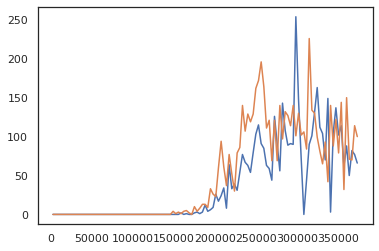

In [10]:
regions = ['Bucks, Pennsylvania, US','Montgomery, Pennsylvania, US']
for region in regions:
  z= m[m['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line();

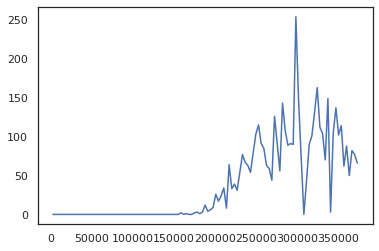

In [11]:
regions = ['Bucks, Pennsylvania, US']
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line();

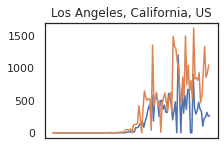

In [12]:
regions = ['Philadelphia, Pennsylvania, US']
regions = ['Potter, Texas, US']
regions = ['Dallas, Texas, US']
#regions = ['New York City, New York, US']
regions = ['Los Angeles, California, US']
regions = ['Philadelphia, Pennsylvania, US','Los Angeles, California, US']
fig=plt.figure()
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line(title=region,xticks=[],ax=fig.add_axes((0.05,0.5,0.4,0.4)));
plt.show()

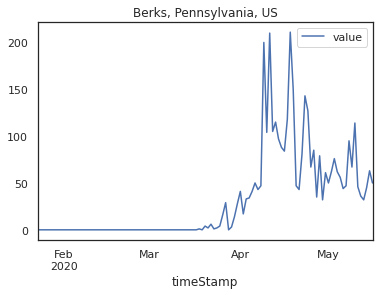

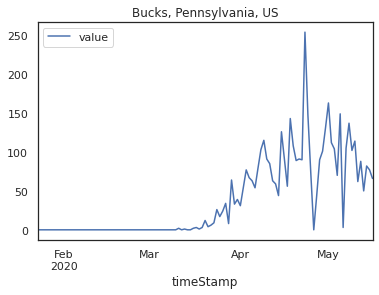

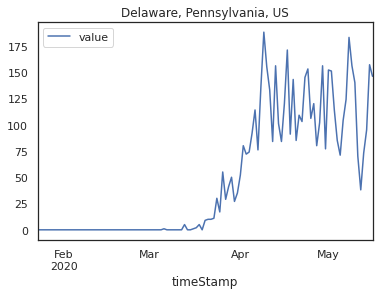

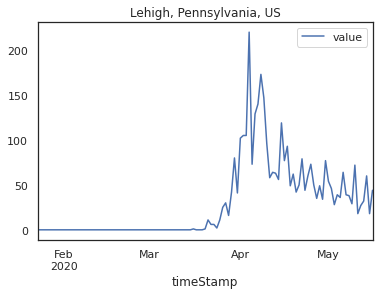

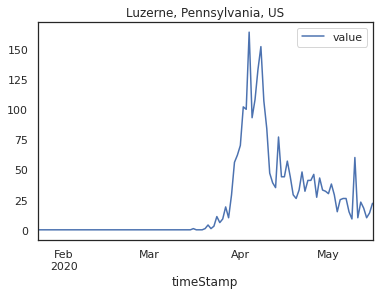

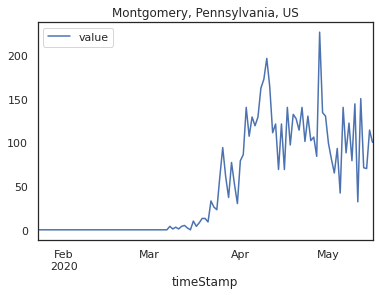

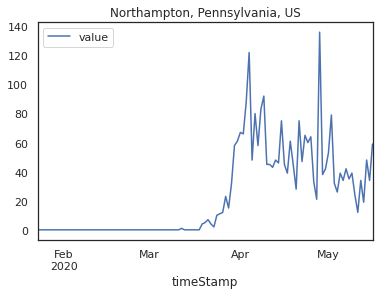

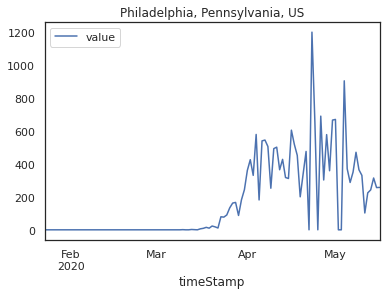

In [13]:
import matplotlib.pyplot as plt


t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

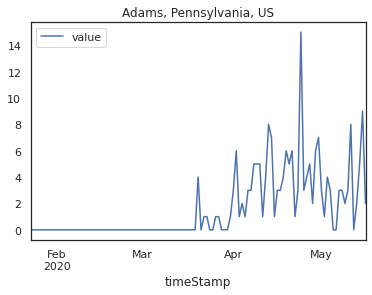

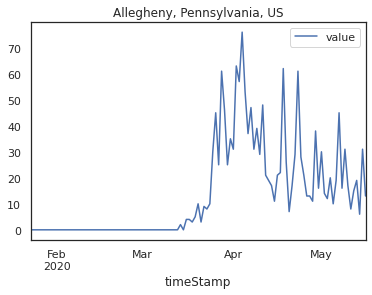

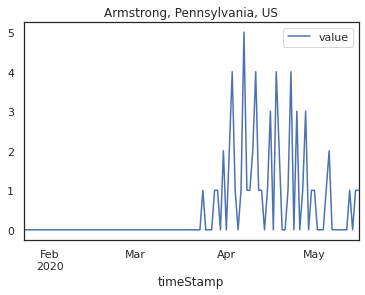

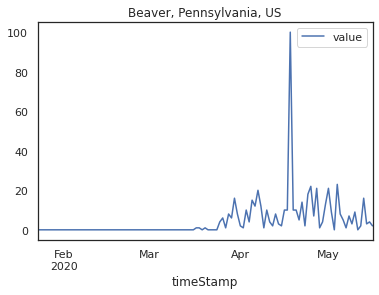

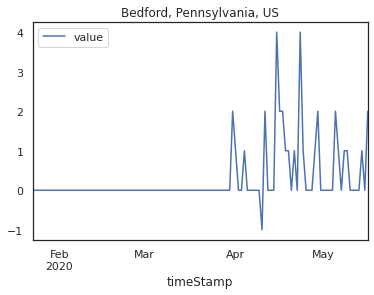

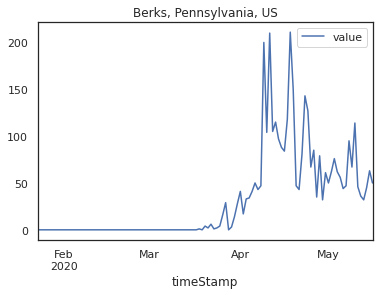

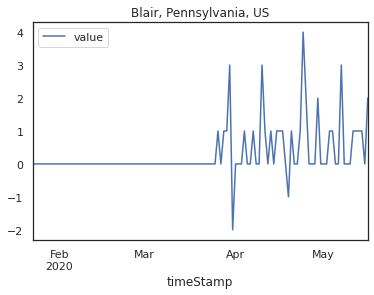

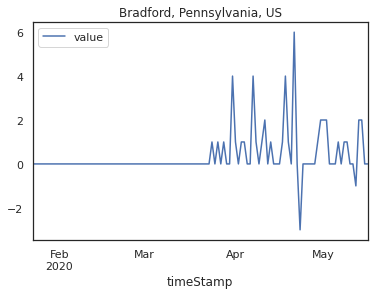

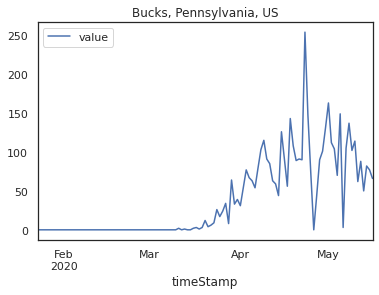

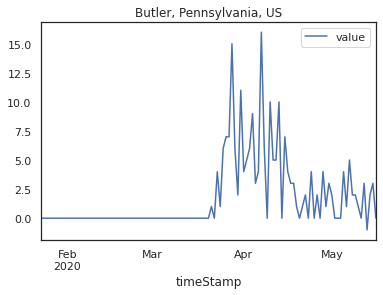

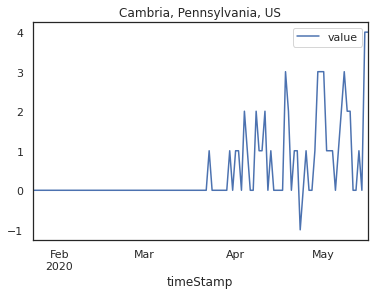

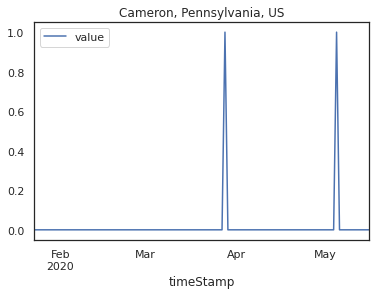

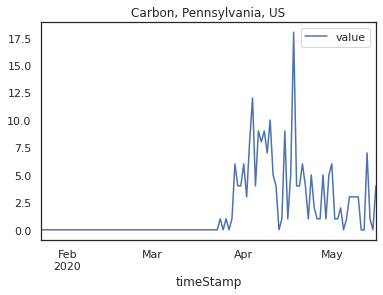

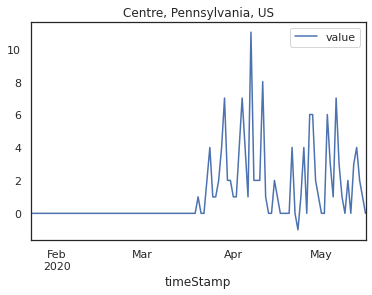

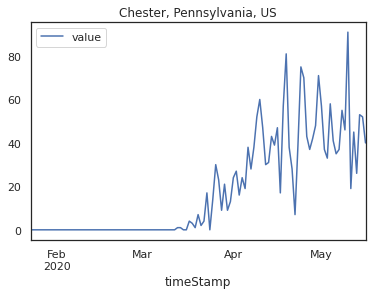

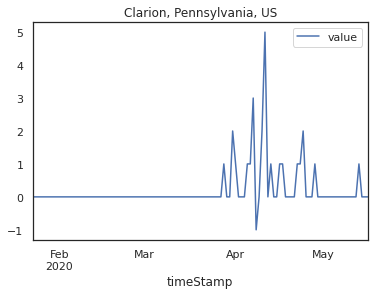

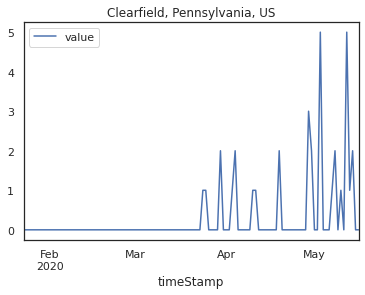

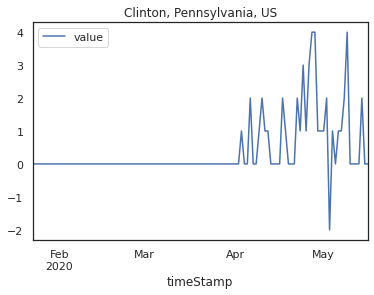

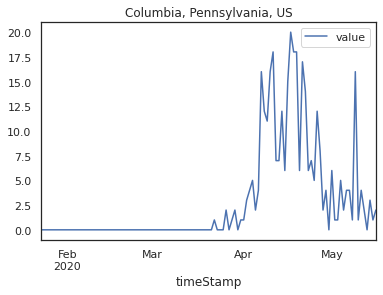

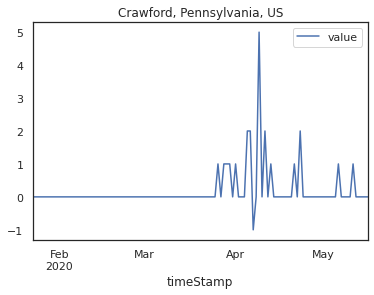

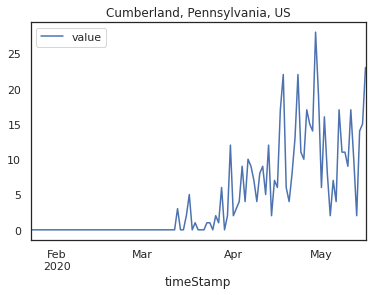

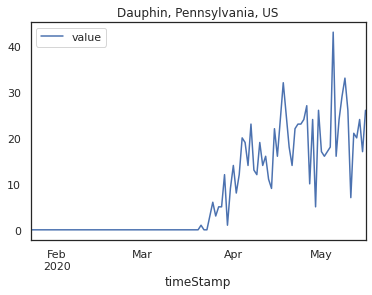

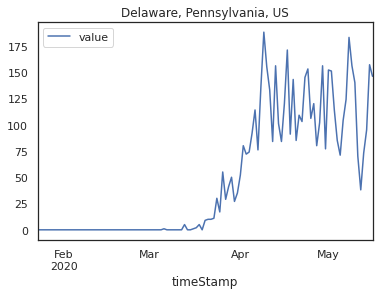

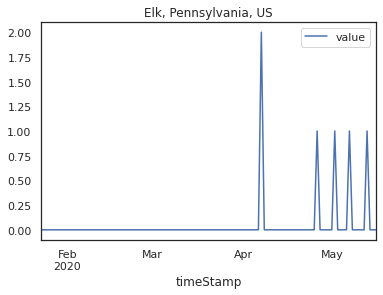

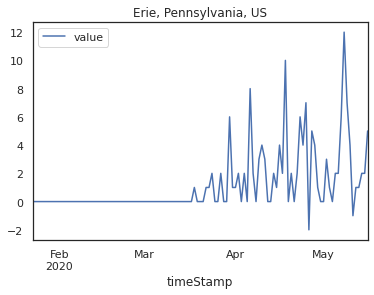

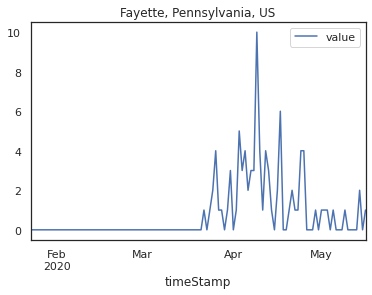

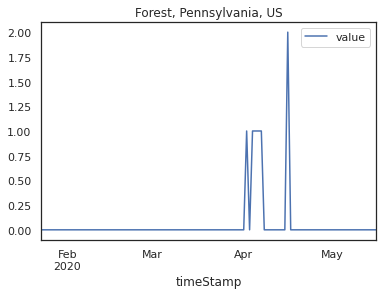

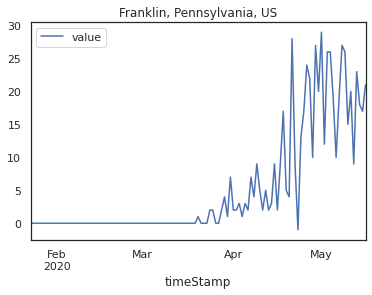

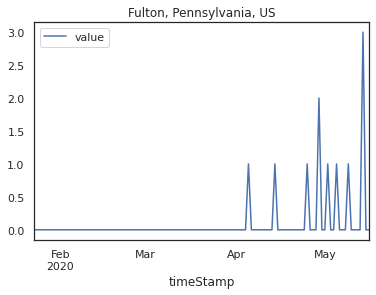

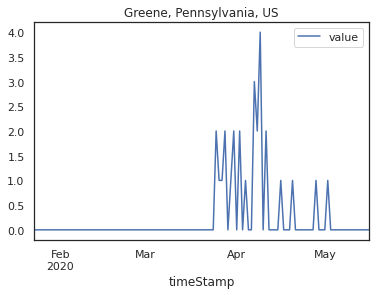

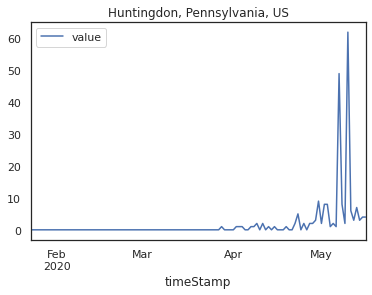

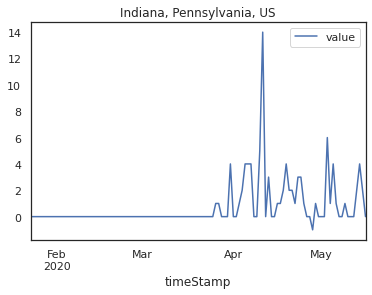

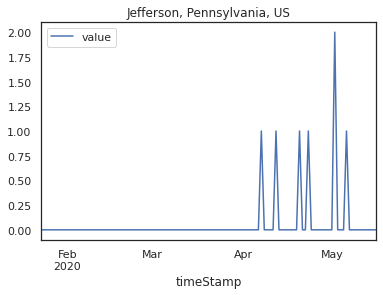

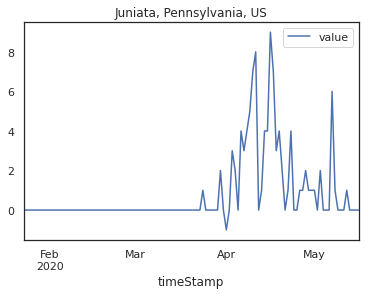

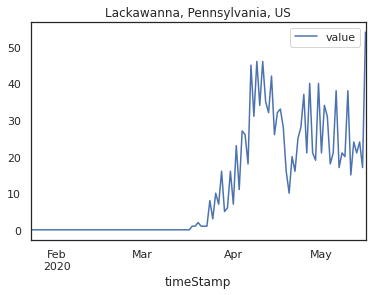

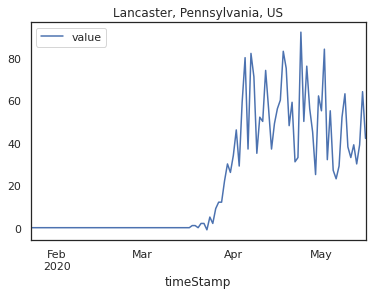

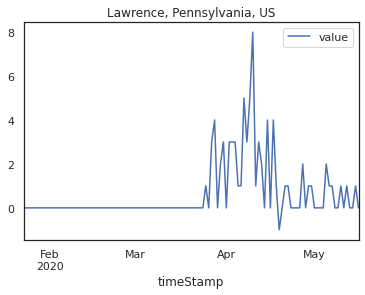

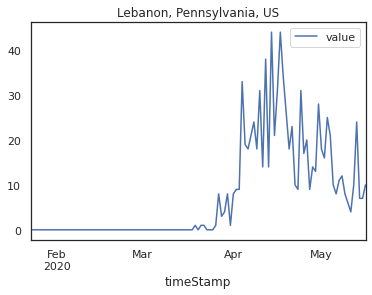

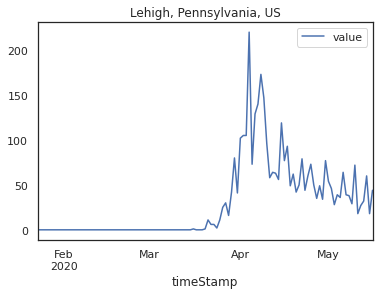

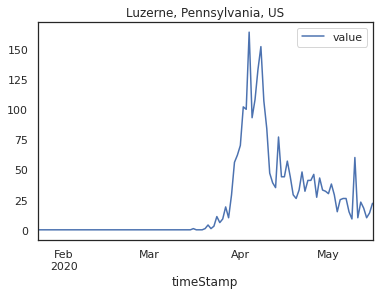

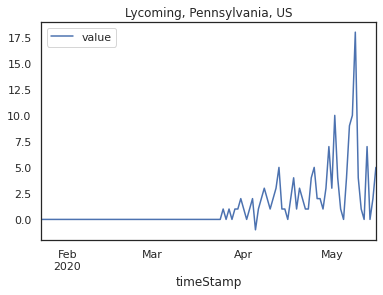

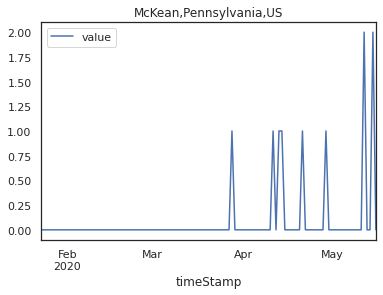

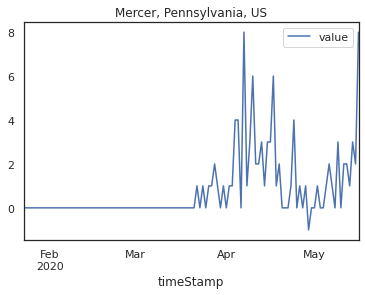

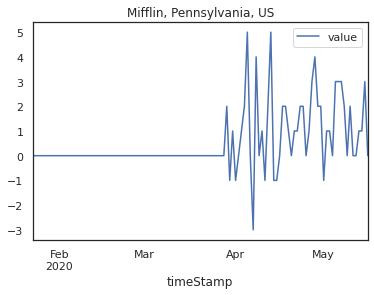

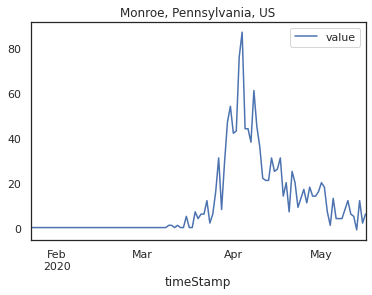

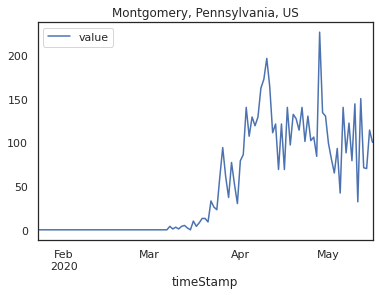

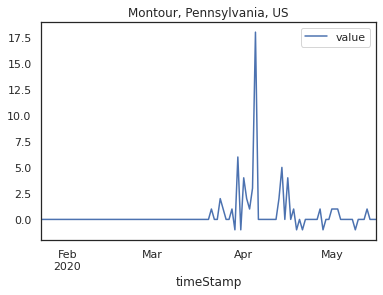

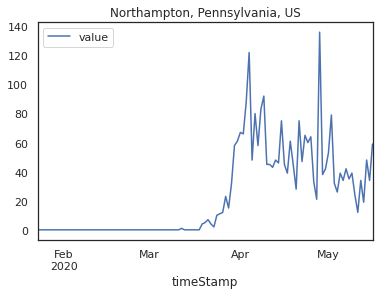

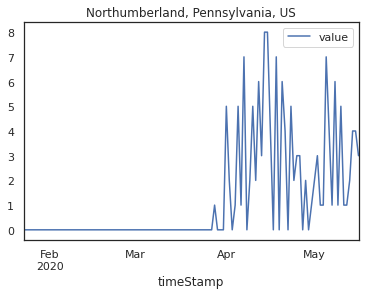

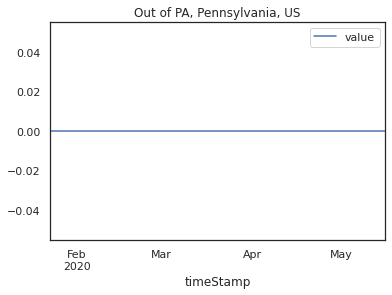

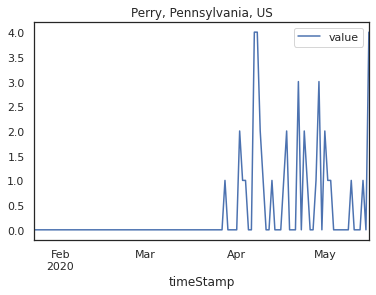

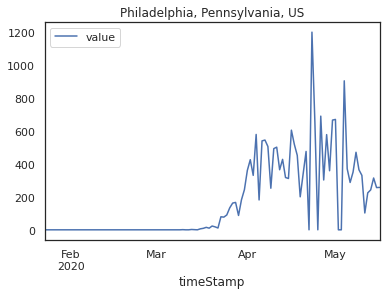

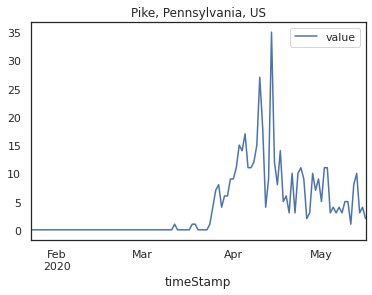

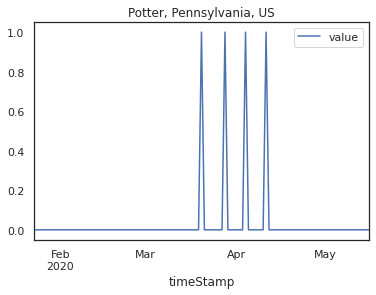

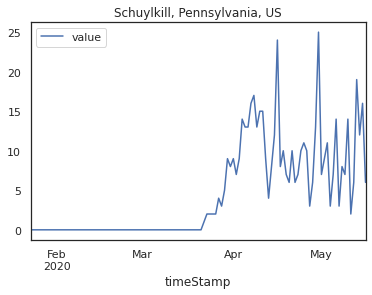

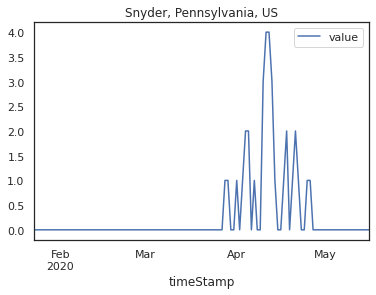

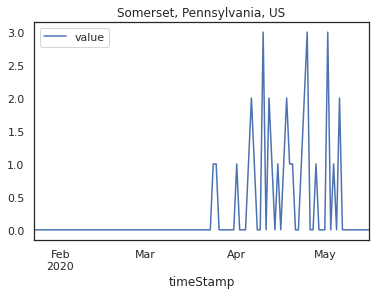

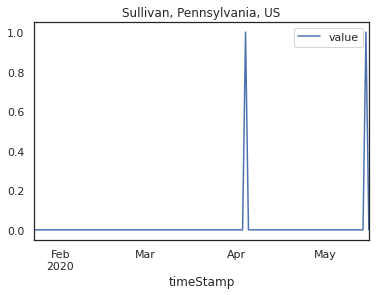

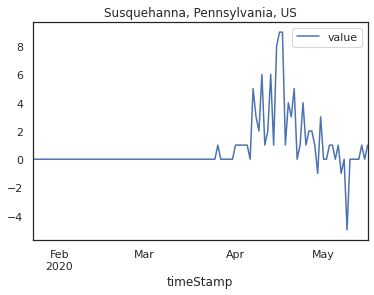

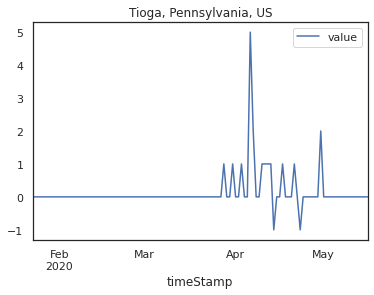

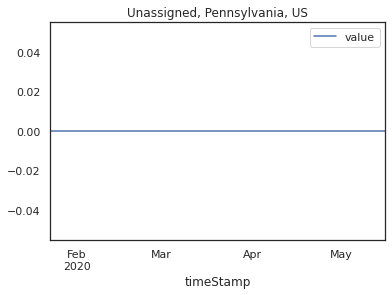

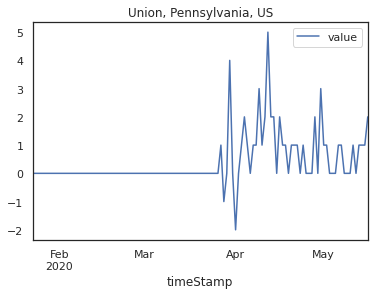

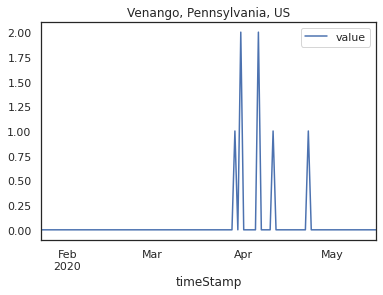

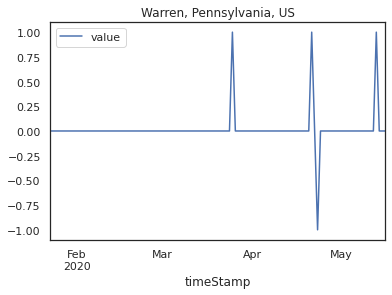

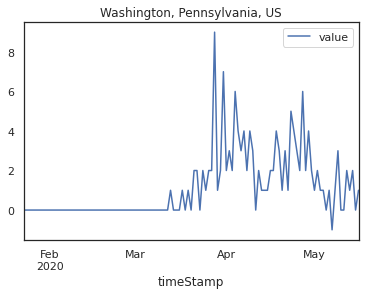

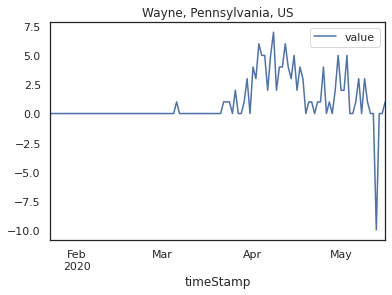

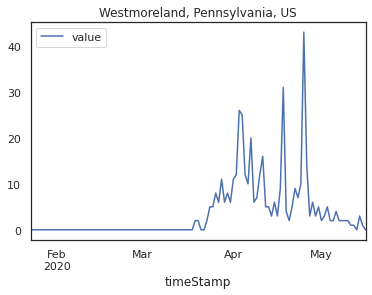

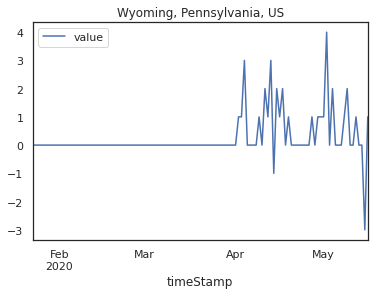

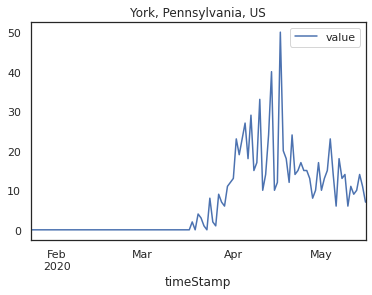

In [14]:
import matplotlib.pyplot as plt
t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

In [15]:
delta_days = 20

from datetime import date, timedelta
dt = date.today() - timedelta(delta_days)
dt.strftime("%Y-%m-%d")

'2020-04-27'

In [16]:
penn = m[m['Country/Region'].str.contains('Pennsylvania', regex=False)]
penn = m
penn = penn[penn['timeStamp'] >= dt.strftime("%Y-%m-%d") ]
penn['timeStamp'].describe()

count                   65220
unique                     20
top       2020-05-05 00:00:00
freq                     3261
first     2020-04-27 00:00:00
last      2020-05-16 00:00:00
Name: timeStamp, dtype: object

In [0]:

pp = penn.pivot(index='Country/Region', columns='timeStamp', values='value')
#sns.heatmap(pp, annot=True)

In [18]:
pp.diff(axis=1)

timeStamp,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16
Country/Region,,,,,,,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",NaN,-2.0,0.0,2.0,-2.0,0.0,2.0,-2.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acadia, Louisiana, US",NaN,0.0,0.0,0.0,3.0,-3.0,1.0,-1.0,2.0,2.0,-2.0,-2.0,9.0,-12.0,7.0,-4.0,-1.0,9.0,22.0,-27.0
"Accomack, Virginia, US",NaN,20.0,-22.0,29.0,4.0,11.0,-3.0,-22.0,-21.0,0.0,26.0,-30.0,33.0,-21.0,4.0,-10.0,9.0,33.0,7.0,-35.0
"Ada, Idaho, US",NaN,12.0,-12.0,9.0,1.0,14.0,-24.0,5.0,-2.0,1.0,0.0,-4.0,10.0,-8.0,4.0,-1.0,-5.0,15.0,-15.0,14.0
"Adair, Iowa, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yuma, Arizona, US",NaN,2.0,0.0,8.0,-9.0,-4.0,9.0,8.0,-17.0,19.0,-5.0,-3.0,6.0,-2.0,-7.0,0.0,68.0,-74.0,23.0,28.0
"Yuma, Colorado, US",NaN,1.0,0.0,-1.0,1.0,-2.0,2.0,-1.0,0.0,0.0,1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,-1.0
"Zapata, Texas, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
t = pp.diff(axis=1).reset_index()
md=pd.melt(t, id_vars=['Country/Region'], value_vars=t.columns[2::])

md.head()

,Country/Region,timeStamp,value
0,"Abbeville, South Carolina, US",2020-04-28,-2.0
1,"Acadia, Louisiana, US",2020-04-28,0.0
2,"Accomack, Virginia, US",2020-04-28,20.0
3,"Ada, Idaho, US",2020-04-28,12.0
4,"Adair, Iowa, US",2020-04-28,0.0


In [20]:
r = md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='5d')]).describe()
r = r.reset_index()
r.columns = r.columns.get_level_values(0)
new_index = ['Country/Region', 'timeStamp', 'count',	'mean',	'std',	'min',	'25%',	'50%',	'75%',	'max']
r.columns = new_index

r[r['max'] > 100]

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
493,"Baltimore City, Maryland, US",2020-05-03,5.0,5.80,62.774995,-55.0,-39.00,7.0,10.00,106.0
494,"Baltimore City, Maryland, US",2020-05-08,5.0,-10.60,125.937683,-158.0,-73.00,-19.0,15.00,182.0
497,"Baltimore, Maryland, US",2020-05-03,5.0,-7.00,106.294402,-165.0,-52.00,29.0,38.00,115.0
498,"Baltimore, Maryland, US",2020-05-08,5.0,-6.40,102.092115,-127.0,-39.00,-34.0,17.00,151.0
771,"Bergen, New Jersey, US",2020-05-13,4.0,-3.00,135.329228,-129.0,-80.25,-34.0,43.25,185.0
...,...,...,...,...,...,...,...,...,...,...
12846,"Woodbury, Iowa, US",2020-05-08,5.0,41.20,132.692125,-81.0,-24.00,-3.0,51.00,263.0
12876,"Worcester, Massachusetts, US",2020-04-28,5.0,34.00,65.230361,-51.0,-13.00,46.0,83.00,105.0
12877,"Worcester, Massachusetts, US",2020-05-03,5.0,-27.40,188.428501,-190.0,-183.00,-57.0,24.00,269.0
12879,"Worcester, Massachusetts, US",2020-05-13,4.0,35.00,92.003623,-83.0,3.25,41.0,72.75,141.0


In [21]:
r[r['Country/Region']=='Montgomery, Pennsylvania, US']

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
7992,"Montgomery, Pennsylvania, US",2020-04-28,5.0,-0.6,86.497399,-92.0,-31.00,-18.0,-4.00,142.0
7993,"Montgomery, Pennsylvania, US",2020-05-03,5.0,1.4,63.125272,-52.0,-51.00,-16.0,28.00,98.0
7994,"Montgomery, Pennsylvania, US",2020-05-08,5.0,12.4,90.732023,-112.0,-43.00,34.0,65.00,118.0
7995,"Montgomery, Pennsylvania, US",2020-05-13,4.0,-12.5,50.823223,-79.0,-30.25,-7.5,10.25,44.0


In [22]:
r.head()

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
0,"Abbeville, South Carolina, US",2020-04-28,5.0,-0.4,1.673320,-2.0,-2.0,0.0,0.0,2.0
1,"Abbeville, South Carolina, US",2020-05-03,5.0,0.2,1.483240,-2.0,0.0,0.0,1.0,2.0
2,"Abbeville, South Carolina, US",2020-05-08,5.0,-0.2,0.447214,-1.0,0.0,0.0,0.0,0.0
3,"Abbeville, South Carolina, US",2020-05-13,4.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Acadia, Louisiana, US",2020-04-28,5.0,0.0,2.121320,-3.0,0.0,0.0,0.0,3.0


In [23]:
t=md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='3d')]).sum()
t=t.reset_index()
total = t.groupby(['Country/Region']).sum().reset_index()
total[total['Country/Region']=='Montgomery, Pennsylvania, US']

,Country/Region,value
1998,"Montgomery, Pennsylvania, US",16.0


In [24]:
pd.set_option('display.max_rows', 1000)
ts = total.sort_values('value',ascending=False)
ts[ts['value']>100].head(300)

,Country/Region,value
2385,"Potter, Texas, US",611.0
715,"Dallas, Texas, US",214.0
1722,"Los Angeles, California, US",188.0
1936,"Milwaukee, Wisconsin, US",179.0
1793,"Maricopa, Arizona, US",177.0
1251,"Hennepin, Minnesota, US",172.0
2564,"San Diego, California, US",171.0
2954,"Unassigned, Rhode Island, US",164.0
816,"Douglas, Nebraska, US",155.0
3234,"Yakima, Washington, US",146.0


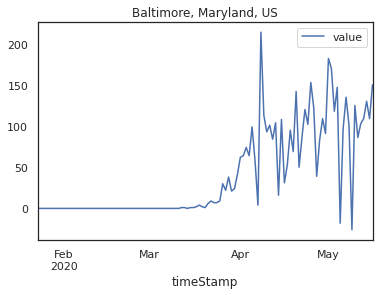

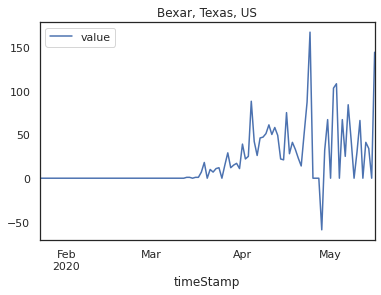

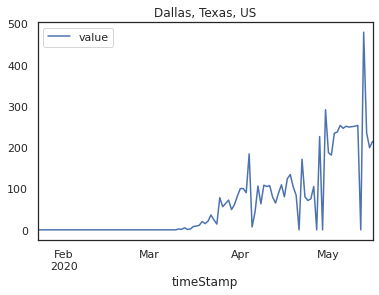

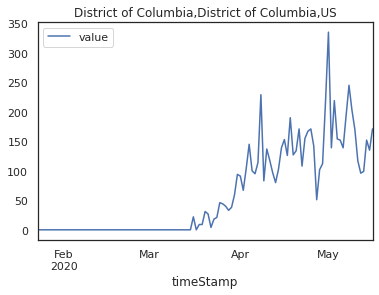

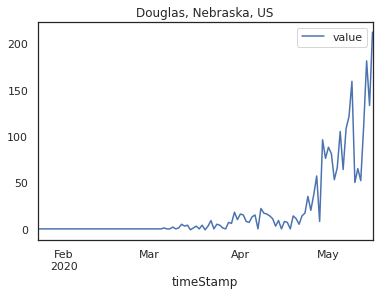

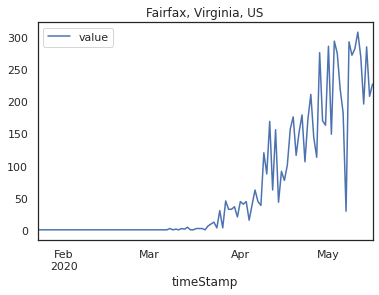

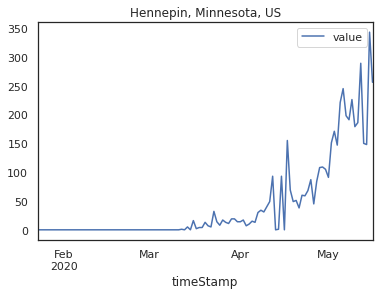

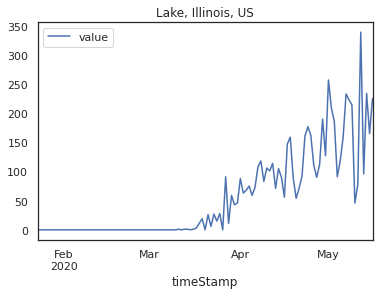

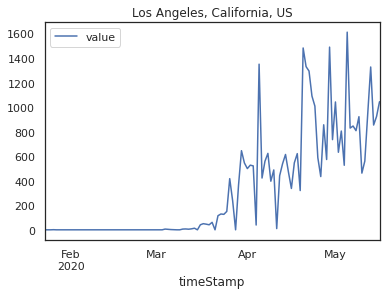

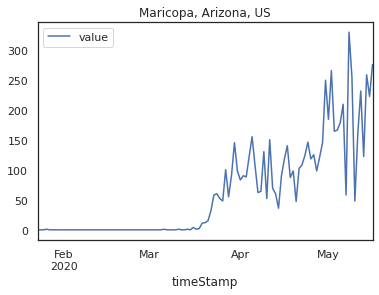

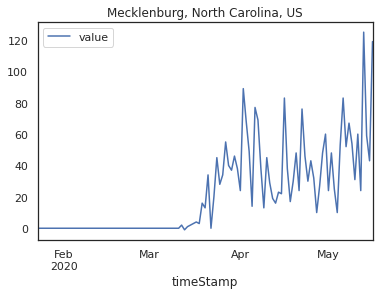

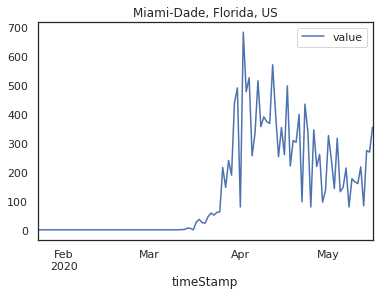

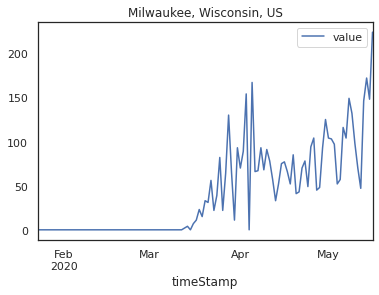

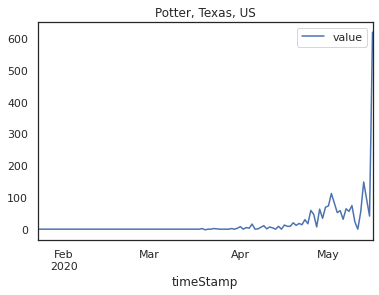

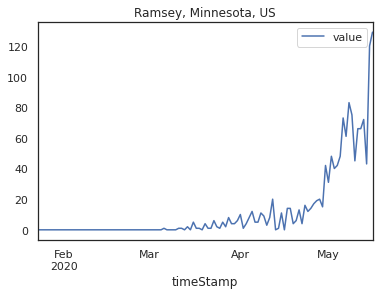

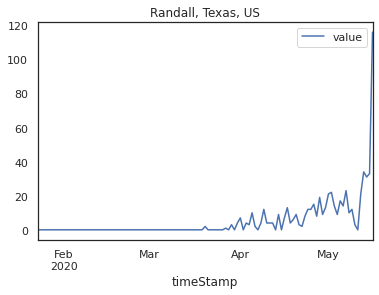

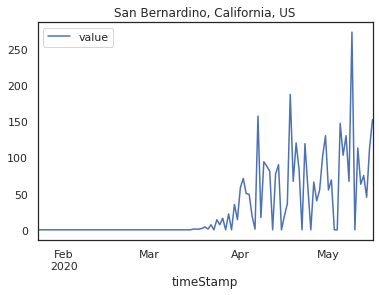

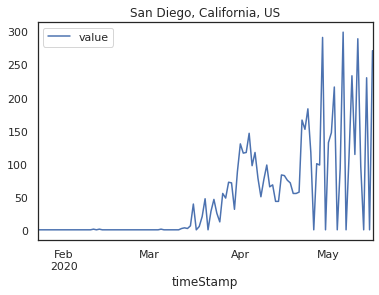

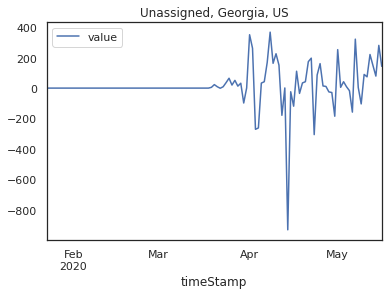

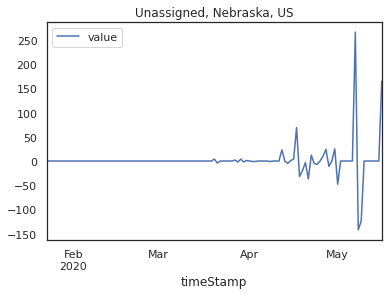

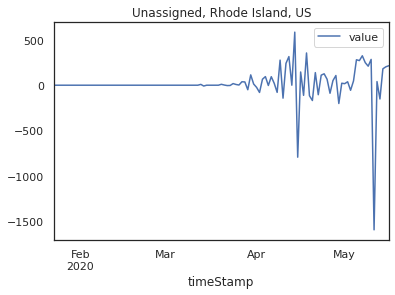

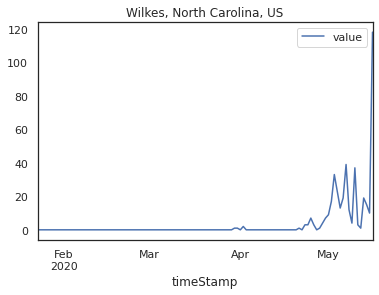

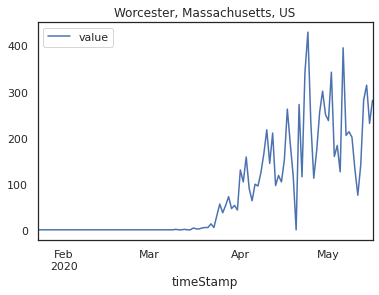

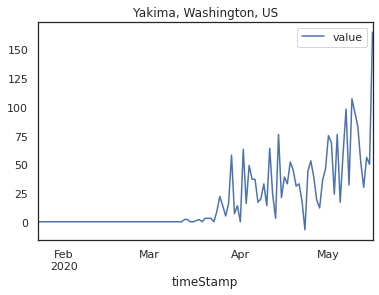

In [25]:
my_list = ts[ts['value']>100]['Country/Region'].tolist()[0:30]

t=m[m['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)